In [116]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf

# Set plot styling
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [ ]:
tickers = ['AAL','ALGT','ALK','DAL','ITA','IYT','JBLU','JETS','LUV','UAL','BNO']
tickers_sub = ['AAL','ALGT','ALK','DAL','JBLU','LUV','UAL']

In [118]:
# Load the stock price data
data_path = Path("../../Data/Processed/stock_data_long.pkl")
with open(data_path, 'rb') as f:
    df = pickle.load(f)

In [121]:
df['ti']=df['date'].dt.time
df.sort_values(by=['ticker', 'date'], inplace=True)

df[f'Volume_Day_lag01'] = None

for time_val in df['ti'].unique():
    mask = df['ti'] == time_val
    subset = df[mask].copy()
    subset = subset.sort_values(['ticker', 'date'])
    
    # Calculate lag for each ticker separately
    lagged_values = subset.groupby('ticker')['Volume'].shift(1)
    df.loc[mask, f'Volume_Day_lag01'] = lagged_values.values

df[f'Volume_Day_lag01'] = df[f'Volume_Day_lag01'].astype(float)

In [122]:
controls = df[['date', 'BNO_Volume', 'ITA_Volume', 'IYT_Volume', 'JETS_Volume'
               , 'BNO_Volume_lag01', 'ITA_Volume_lag01', 'IYT_Volume_lag01', 'JETS_Volume_lag01']].drop_duplicates().reset_index(drop=True)
controls.rename(columns={
    'BNO_Volume': 'BNO',
    'ITA_Volume': 'ITA',
    'IYT_Volume': 'IYT',
    'JETS_Volume': 'JETS',
    'BNO_Volume_lag01': 'BNO_lag01',
    'ITA_Volume_lag01': 'ITA_lag01',
    'IYT_Volume_lag01': 'IYT_lag01',
    'JETS_Volume_lag01': 'JETS_lag01'
}, inplace=True)

In [ ]:
volumes = df[['date', 'ticker', 'Volume', 'Volume_lag01', 'Volume_Day_lag01', 'Change_Volume']].pivot(index='date', columns='ticker', values=['Volume', 'Volume_lag01', 'Volume_Day_lag01', 'Change_Volume'])
# Flatten the MultiIndex columns
volumes.columns = ['_'.join(col).strip() for col in volumes.columns.values]
volumes.columns = [col.replace('Volume_', '') for col in volumes.columns.values]

#volumes = pd.merge(volumes, controls, on='date', how='left').reset_index(drop=True)
volumes = volumes.dropna()

,AAL,ALGT,ALK,DAL,JBLU,LUV,UAL,lag01_AAL,lag01_ALGT,lag01_ALK,...,Day_lag01_JBLU,Day_lag01_LUV,Day_lag01_UAL,Change_AAL,Change_ALGT,Change_ALK,Change_DAL,Change_JBLU,Change_LUV,Change_UAL
date,,,,,,,,,,,,,,,,,,,,,
2018-01-03 09:30:00,256263.0,8338.0,50222.0,515581.0,158179.0,126345.0,131471.0,412345.0,11387.0,150603.0,...,293572.0,224948.0,116039.0,-156082.0,-3049.0,-100381.0,-15370.0,-287561.0,-367397.0,-203387.0
2018-01-03 09:45:00,178545.0,4640.0,81172.0,620215.0,391825.0,268044.0,374983.0,256263.0,8338.0,50222.0,...,121302.0,208563.0,130163.0,-77718.0,-3698.0,30950.0,104634.0,233646.0,141699.0,243512.0
2018-01-03 10:00:00,129775.0,6630.0,43195.0,323212.0,174347.0,170788.0,173258.0,178545.0,4640.0,81172.0,...,103446.0,135579.0,63010.0,-48770.0,1990.0,-37977.0,-297003.0,-217478.0,-97256.0,-201725.0
2018-01-03 10:15:00,57301.0,5861.0,77939.0,300780.0,256083.0,92818.0,109497.0,129775.0,6630.0,43195.0,...,59784.0,87538.0,101656.0,-72474.0,-769.0,34744.0,-22432.0,81736.0,-77970.0,-63761.0
2018-01-03 10:30:00,874095.0,4500.0,45575.0,428438.0,192404.0,192468.0,100652.0,57301.0,5861.0,77939.0,...,56808.0,127150.0,63372.0,816794.0,-1361.0,-32364.0,127658.0,-63679.0,99650.0,-8845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30 14:45:00,1445222.0,6516.0,27711.0,261687.0,791081.0,171924.0,144655.0,1073713.0,5145.0,30997.0,...,521436.0,141624.0,276367.0,371509.0,1371.0,-3286.0,-160325.0,288907.0,2978.0,25287.0
2025-05-30 15:00:00,1866339.0,5159.0,43059.0,206491.0,763213.0,228804.0,169821.0,1445222.0,6516.0,27711.0,...,886540.0,169776.0,86995.0,421117.0,-1357.0,15348.0,-55196.0,-27868.0,56880.0,25166.0
2025-05-30 15:15:00,1436577.0,11567.0,70278.0,394754.0,1133607.0,281941.0,402686.0,1866339.0,5159.0,43059.0,...,1701591.0,315925.0,107823.0,-429762.0,6408.0,27219.0,188263.0,370394.0,53137.0,232865.0


In [124]:
# Compute correlation matrix of daily returns
correlation_matrix = volumes.corr()

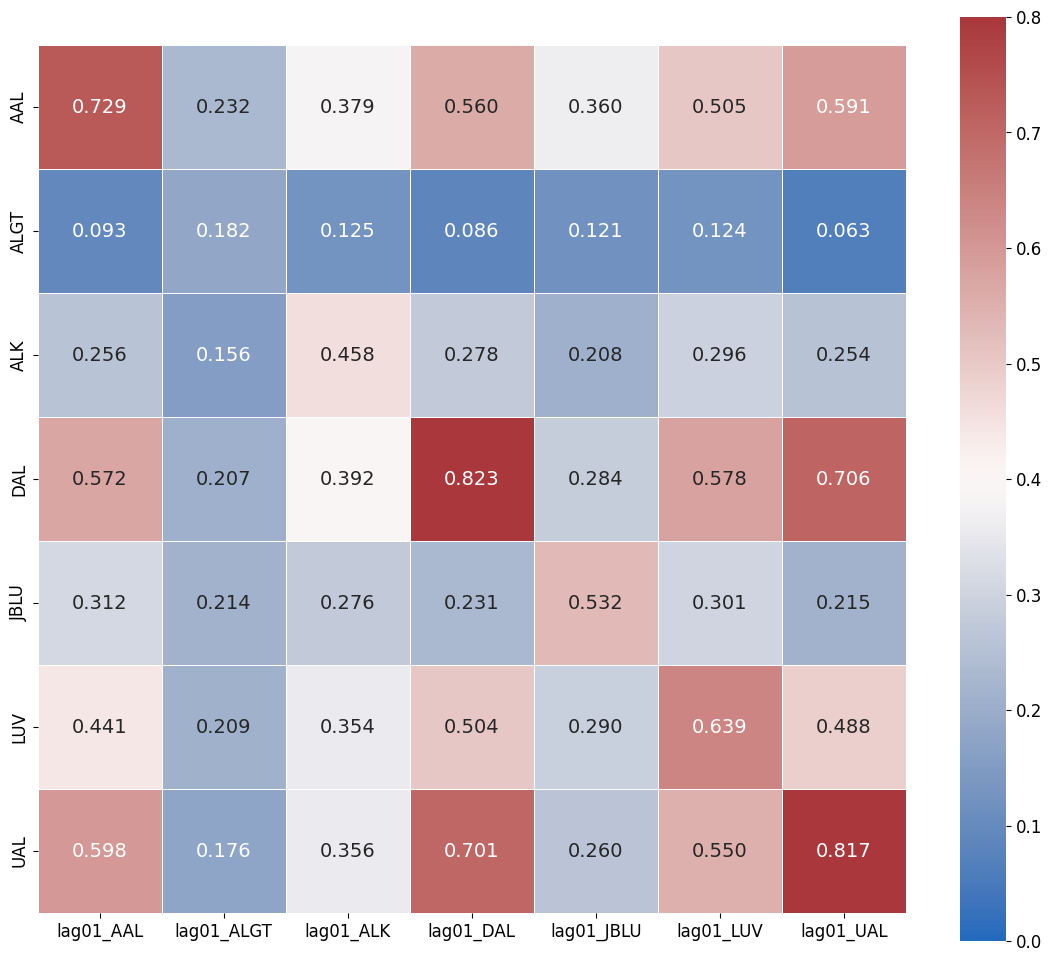

In [126]:
# Visualize the correlation matrix as a heatmap
plot_data = correlation_matrix.filter([f'{i}' for i in tickers_sub], axis=0).copy()
plot_data=plot_data[[f'lag01_{i}' for i in tickers_sub]]
plt.figure(figsize=(14, 12))
sns.heatmap(plot_data, annot=True, cmap='vlag', vmin=-0, vmax=0.8, fmt='.3f',linewidths=0.5,square=True,annot_kws={'size': 14})
plt.savefig('../../Output/Correlation Matrices/Lagged_Volume.png', dpi=1200)

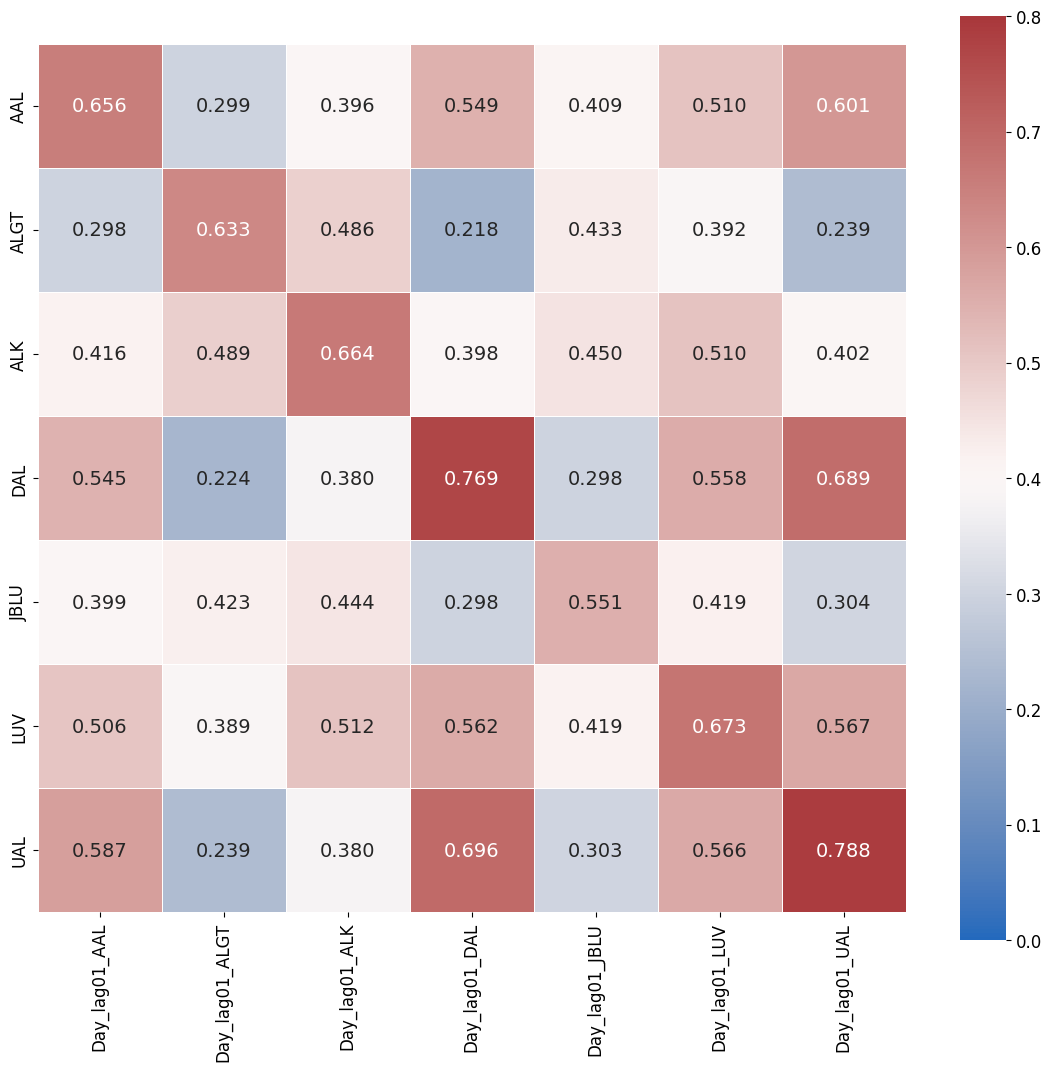

In [127]:
# Visualize the correlation matrix as a heatmap
plot_data = correlation_matrix.filter([f'{i}' for i in tickers_sub], axis=0).copy()
plot_data=plot_data[[f'Day_lag01_{i}' for i in tickers_sub]]
plt.figure(figsize=(14, 12))
sns.heatmap(plot_data, annot=True, cmap='vlag', vmin=-0, vmax=0.8, fmt='.3f',linewidths=0.5,square=True,annot_kws={'size': 14})
plt.savefig('../../Output/Correlation Matrices/Lagged_Volume_Day.png', dpi=1200)

<Figure size 1400x800 with 0 Axes>

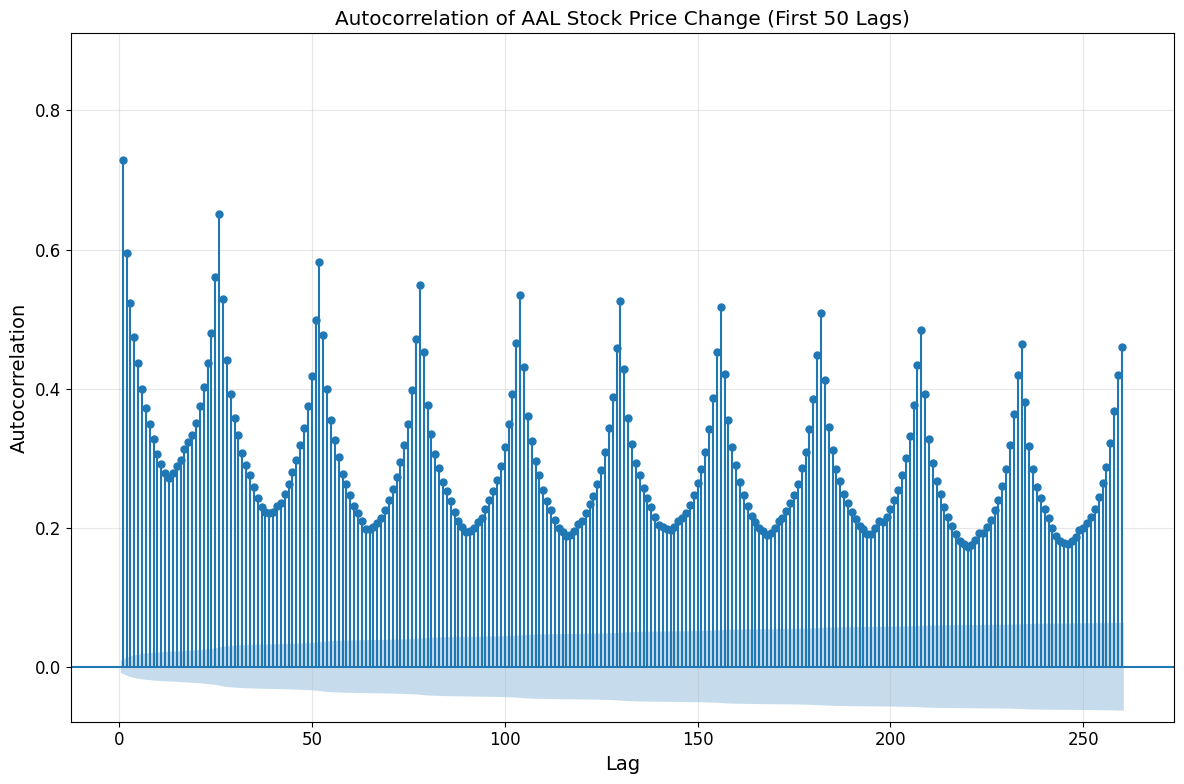

In [128]:
# Plot autocorrelation for AAL stock for the first 50 lags
plt.figure(figsize=(14, 8))

# Create a clean autocorrelation plot
plot_acf(volumes['AAL'].dropna(), 
         lags=260, 
         alpha=0.05, 
         title=f'Autocorrelation of AAL Stock Price Change (First 50 Lags)',
         zero=False,
         auto_ylims=True)

# Enhance plot appearance
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

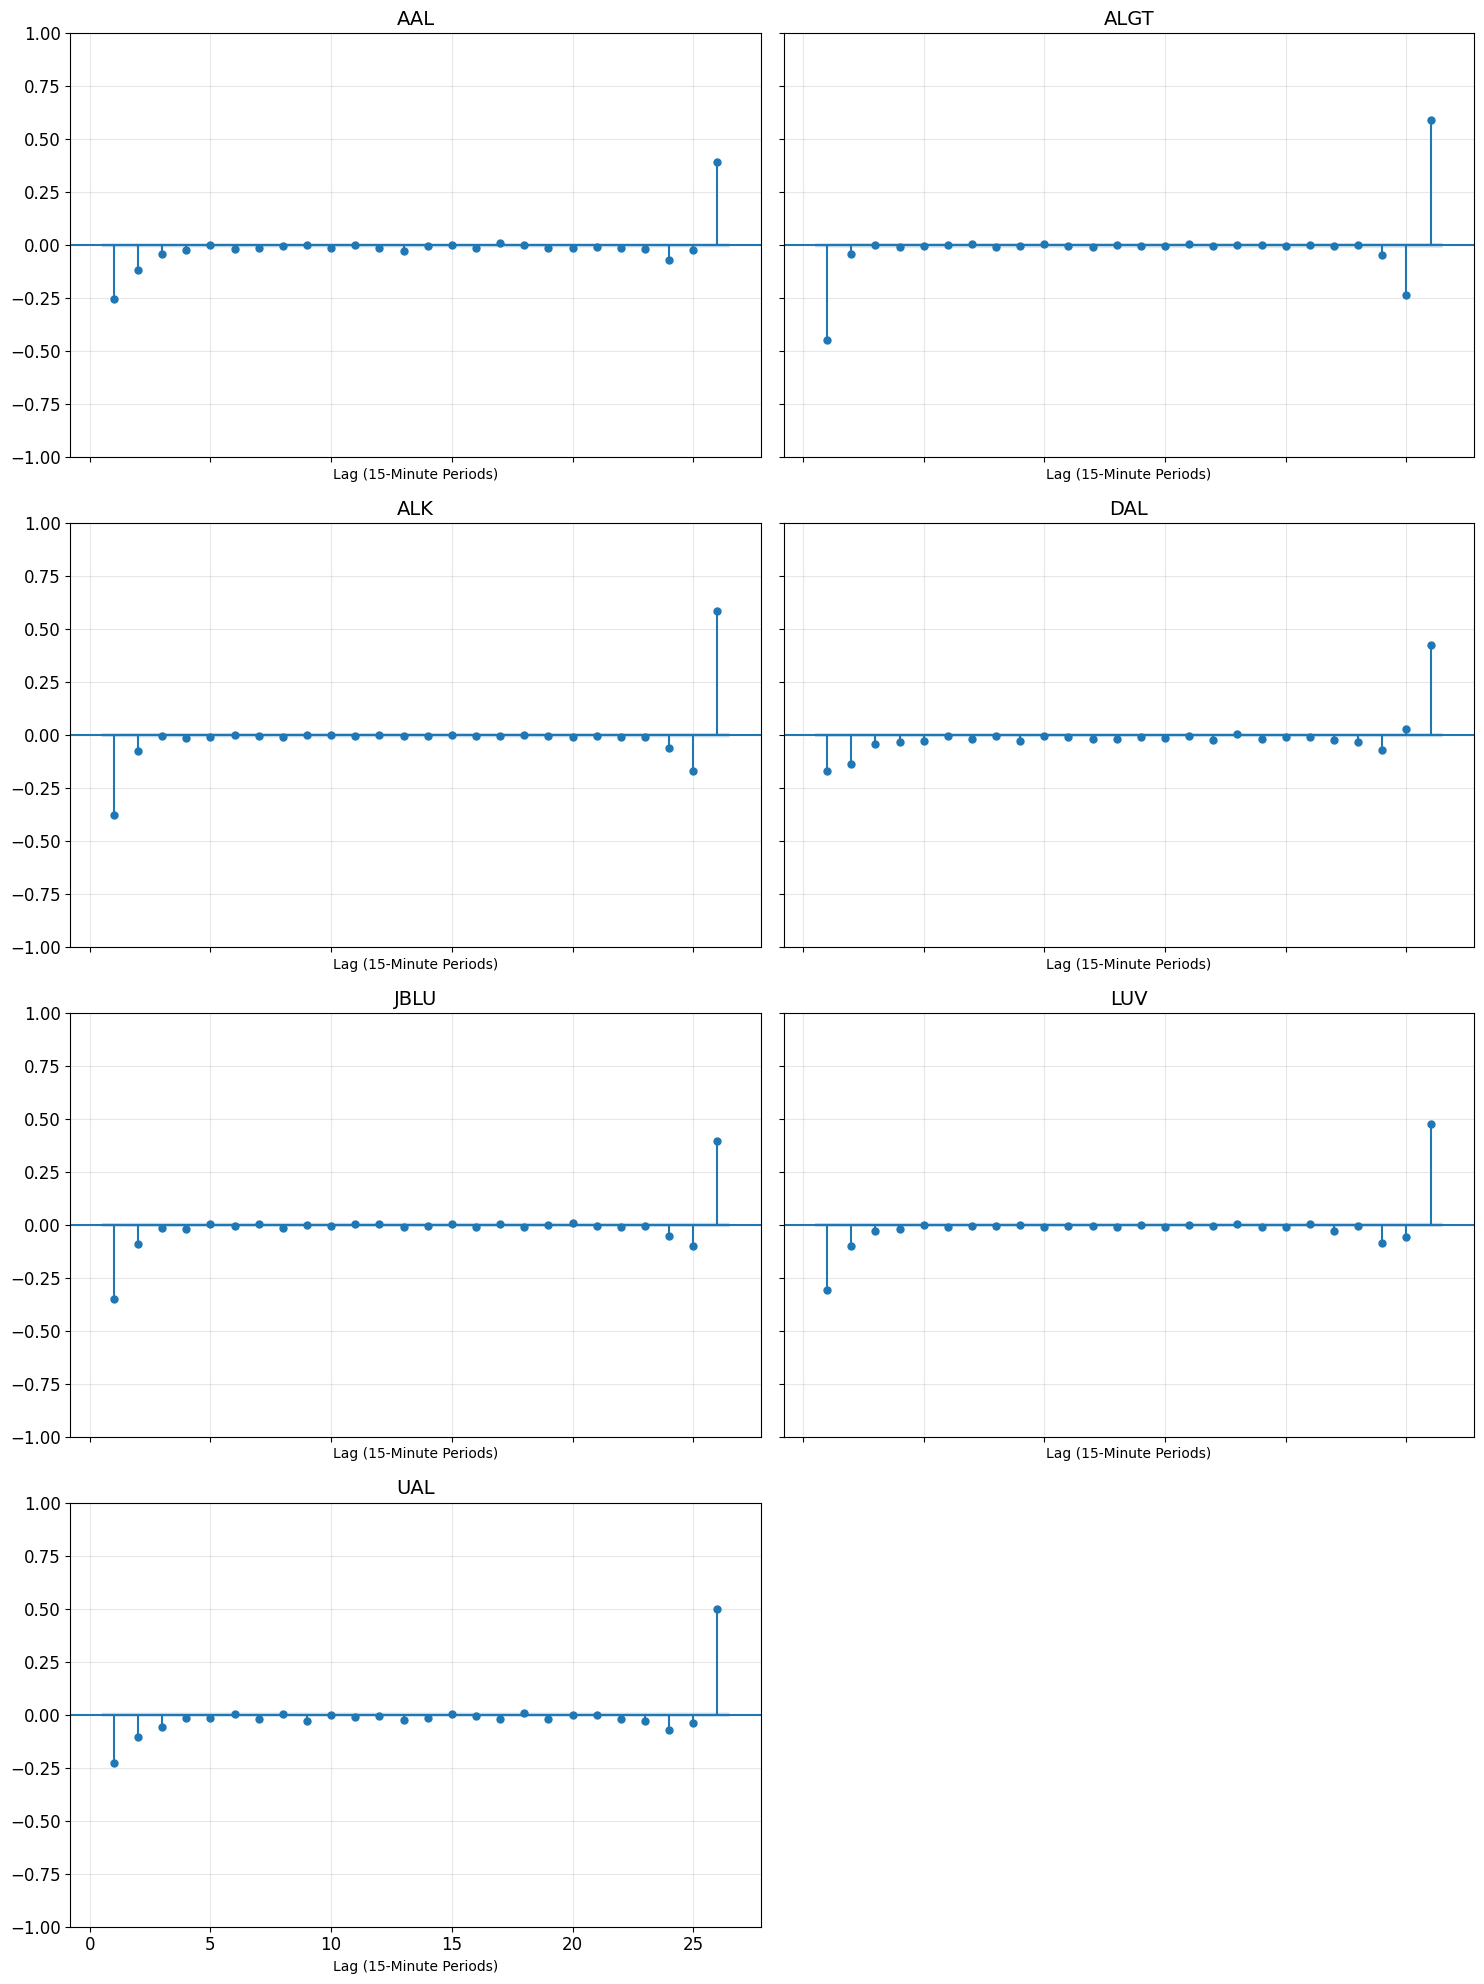

In [129]:
# Create a matrix of autocorrelation plots for all tickers
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, ticker in enumerate(tickers_sub):
    # Plot autocorrelation for each ticker
    plot_acf(volumes[f'Change_{ticker}'].dropna(), 
             lags=26, 
             alpha=0.05, 
             title=f'{ticker}',
             zero=False,
             auto_ylims=False,
             ax=axes[i])
    
    # Customize each subplot
    axes[i].set_xlabel('Lag (15-Minute Periods)', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_title(f'{ticker}', fontsize=14)

# Remove unused subplots
for j in range(len(tickers_sub), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('../../Output/Correlation Matrices/Autocorrelations.png', dpi=1200)